In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"The number of cities found is {len(cities)}.")

The number of cities found is 587.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# set up lists to hold reponse info
city_updated = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

In [15]:
# Loop through the list of cities and perform a request for data on each
print("Begining Data Retrival")

record = 1
group = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_updated.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing record {record} of set {group} | {city}")
        record = record + 1
        set_change = record / 51 
        if set_change == 1:
            group = group + 1
            record = 1
    except:
        print(f"The city {city} was not found, trying next one.")
    

print("----------------")
print("Data Retrival Complete")
print("----------------")

Begining Data Retrival
Processing record 1 of set 1 | saint george
Processing record 2 of set 1 | rikitea
Processing record 3 of set 1 | mataura
Processing record 4 of set 1 | balabac
Processing record 5 of set 1 | bredasdorp
Processing record 6 of set 1 | ilulissat
Processing record 7 of set 1 | salalah
Processing record 8 of set 1 | butaritari
Processing record 9 of set 1 | yellowknife
The city attawapiskat was not found, trying next one.
Processing record 10 of set 1 | puerto baquerizo moreno
Processing record 11 of set 1 | ponta do sol
The city tabiauea was not found, trying next one.
Processing record 12 of set 1 | narsaq
Processing record 13 of set 1 | avarua
Processing record 14 of set 1 | fortuna
Processing record 15 of set 1 | ketchikan
Processing record 16 of set 1 | kieta
Processing record 17 of set 1 | norman wells
Processing record 18 of set 1 | saldanha
Processing record 19 of set 1 | zhigansk
Processing record 20 of set 1 | simao
Processing record 21 of set 1 | saint-phi

Processing record 27 of set 4 | inverness
Processing record 28 of set 4 | barrow
Processing record 29 of set 4 | grand-santi
Processing record 30 of set 4 | iqaluit
Processing record 31 of set 4 | muravlenko
Processing record 32 of set 4 | lavrentiya
Processing record 33 of set 4 | taos
Processing record 34 of set 4 | opalenica
Processing record 35 of set 4 | kutoarjo
Processing record 36 of set 4 | naryan-mar
Processing record 37 of set 4 | leningradskiy
Processing record 38 of set 4 | riviere-au-renard
Processing record 39 of set 4 | landeck
Processing record 40 of set 4 | okakarara
Processing record 41 of set 4 | oranjemund
Processing record 42 of set 4 | chokurdakh
Processing record 43 of set 4 | soe
Processing record 44 of set 4 | palana
Processing record 45 of set 4 | zamora
Processing record 46 of set 4 | manacor
The city ruatoria was not found, trying next one.
Processing record 47 of set 4 | luancheng
Processing record 48 of set 4 | obo
Processing record 49 of set 4 | cidreira

Processing record 13 of set 8 | marathon
Processing record 14 of set 8 | jardim
Processing record 15 of set 8 | lompoc
Processing record 16 of set 8 | vaasa
Processing record 17 of set 8 | kichera
Processing record 18 of set 8 | qasigiannguit
Processing record 19 of set 8 | volterra
Processing record 20 of set 8 | vila franca do campo
Processing record 21 of set 8 | tura
The city ngukurr was not found, trying next one.
Processing record 22 of set 8 | apatin
Processing record 23 of set 8 | rundu
Processing record 24 of set 8 | rocha
Processing record 25 of set 8 | lebyazhye
Processing record 26 of set 8 | farsala
Processing record 27 of set 8 | dinan
Processing record 28 of set 8 | port macquarie
Processing record 29 of set 8 | oroquieta
Processing record 30 of set 8 | roald
Processing record 31 of set 8 | ambovombe
Processing record 32 of set 8 | altoona
Processing record 33 of set 8 | lasa
Processing record 34 of set 8 | karpathos
Processing record 35 of set 8 | awjilah
Processing rec

Processing record 50 of set 11 | naantali
Processing record 1 of set 12 | tautira
Processing record 2 of set 12 | iwanai
Processing record 3 of set 12 | mantenopolis
Processing record 4 of set 12 | igarka
Processing record 5 of set 12 | kungurtug
Processing record 6 of set 12 | jumla
Processing record 7 of set 12 | mutis
Processing record 8 of set 12 | watertown
Processing record 9 of set 12 | kibre mengist
Processing record 10 of set 12 | moses lake
Processing record 11 of set 12 | sioux falls
Processing record 12 of set 12 | bonthe
Processing record 13 of set 12 | togur
Processing record 14 of set 12 | usevya
Processing record 15 of set 12 | goderich
Processing record 16 of set 12 | watsa
Processing record 17 of set 12 | coihaique
Processing record 18 of set 12 | winnemucca
Processing record 19 of set 12 | raudeberg
----------------
Data Retrival Complete
----------------


### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv.

In [27]:
 # create a data frame from cities, lat, and temp
weather_columns = {
    "City": city_updated,
    "Lat": latitude,
    "Long" : longitude,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country" : country,
    "Date" : date
}
city_weather_df = pd.DataFrame(weather_columns)
city_weather_df.to_csv("weather_data/city_weather.csv")
new_city = city_weather_df["City"].count()
print(f"The number of cities with weather data is {new_city}.")

The number of cities with weather data is 569.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
max_humidity = city_weather_df["Humidity"].max()
print(f"The max humidity is currently {max_humidity}%.")

The max humidity is currently 100%.


In [104]:
#grab all cities that have a humidity less than 100%
city_weather_df["Humidity"].astype(float)
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"] != 100, :]
new_max_humidity = clean_city_data["Humidity"].max()
print(f"The new max humidity is currently {new_max_humidity}%.")
new_city_count = clean_city_data["City"].count()
print(f"The number of cities with weather data and have a humidity of less than 100% are {new_city_count}.")

The new max humidity is currently 99%.
The number of cities with weather data and have a humidity of less than 100% are 561.


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [75]:
#finding the date 
thedate = datetime.datetime.utcfromtimestamp(clean_city_data["Date"][0]).strftime('%y-%m-%d')

## Temperature vs. Latitude Plot

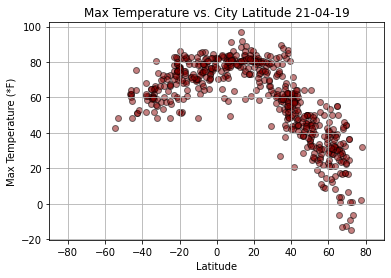

In [140]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="darkred", edgecolors="black", alpha =.5)
plt.xlim(-90,90)
plt.title(f"Max Temperature vs. City Latitude {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (*F)")
plt.grid()
plt.savefig("weather_data/temp_latitude.png")
plt.show()

The above plot of Temperature vs. Latitude is analyzing the relationship between distance from the equater and how hot a city is. This figure shows that the closer a city gets to the equater the more likely they are to be hotter.

## Humidity vs. Latitiude Plot

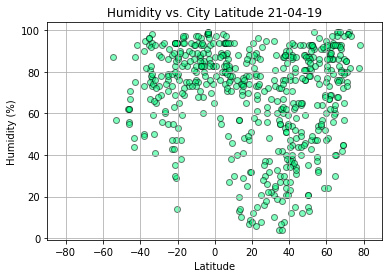

In [135]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="springgreen", edgecolors="black", alpha =.5)
plt.xlim(-90,90)
plt.title(f"Humidity vs. City Latitude {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("weather_data/humid_latitude.png")
plt.show()

The above plot of Humidity vs. Latitude is analyzing the relationship between distance from the equater and how humid a city is. This figure shows a slight trend that the closer a city gets to the equater it is slightly more likely to be more humid.

## Cloudiness vs. Latitude Plot

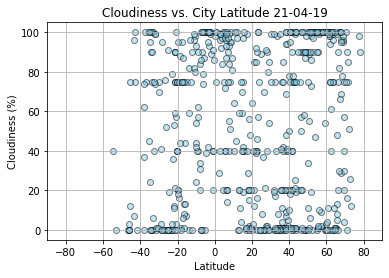

In [106]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha =.5)
plt.xlim(-90,90)
plt.title(f"Cloudiness vs. City Latitude {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("weather_data/cloud_latitude.png")
plt.show()

The above plot of Cloudiness vs. Latitude is analyzing the relationship between distance from the equater and how cloudy a city is. This figure does not upon visual inspection show a trend between cloudiness and distance from the equator.

## Wind Speed vs. Latitude Plot

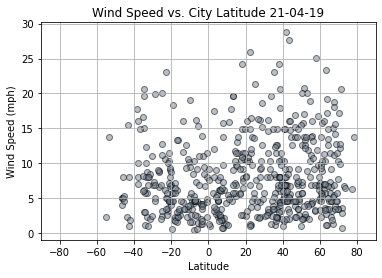

In [141]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="slategrey", edgecolors="black", alpha =.5)
plt.xlim(-90,90)
plt.title(f"Wind Speed vs. City Latitude {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("weather_data/wind_latitude.png")
plt.show()

The above plot of Wind Speed vs. Latitude is analyzing the relationship between distance from the equater and how windy a city is. This figure does not upon visual inspection show a trend between wind speed and distance from the equator.

# Linear Regression

In [81]:
#confirmed there are no cities at 0 Latitude
#create a north and a south dataframe
north_city_data = clean_city_data.loc[clean_city_data["Lat"] > 0, :]
south_city_data = clean_city_data.loc[clean_city_data["Lat"] < 0, :]

## Max Temp

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

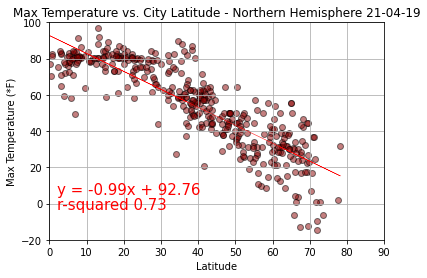

In [139]:
#linear regression
slope_temp_north, int_temp_north, r_temp_north, p_temp_north, std_temp_north = linregress(north_city_data["Lat"], north_city_data["Max Temp"])
fit_temp_north = slope_temp_north * north_city_data["Lat"] + int_temp_north
line_temp_north = "y = " + str(round(slope_temp_north,2)) + "x + " + str(round(int_temp_north,2))
r_sq_temp_north = "r-squared " + str(round(r_temp_north**2,2))

#graphing
plt.scatter(north_city_data["Lat"], north_city_data["Max Temp"], marker="o", facecolors="darkred", edgecolors="black", alpha =.5)
plt.xlim(0,90)
plt.ylim(-20,100)
plt.title(f"Max Temperature vs. City Latitude - Northern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (*F)")
plt.grid()

plt.plot(north_city_data["Lat"], fit_temp_north, "red", linewidth=.5)
plt.annotate(line_temp_north ,(2,5),fontsize=15,color="red")
plt.annotate(r_sq_temp_north ,(2,-3),fontsize=15,color="red")

plt.savefig("weather_data/temp_latitude_north.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

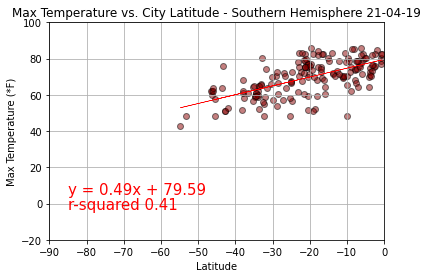

In [138]:
#linear regression
slope_temp_south, int_temp_south, r_temp_south, p_temp_south, std_temp_south = linregress(south_city_data["Lat"], south_city_data["Max Temp"])
fit_temp_south = slope_temp_south * south_city_data["Lat"] + int_temp_south
line_temp_south = "y = " + str(round(slope_temp_south,2)) + "x + " + str(round(int_temp_south,2))
r_sq_temp_south = "r-squared " + str(round(r_temp_south**2,2))

#graphing
plt.scatter(south_city_data["Lat"], south_city_data["Max Temp"], marker="o", facecolors="darkred", edgecolors="black", alpha =.5)
plt.xlim(-90,0)
plt.ylim(-20,100)
plt.title(f"Max Temperature vs. City Latitude - Southern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (*F)")
plt.grid()

plt.plot(south_city_data["Lat"], fit_temp_south, "red", linewidth=.5)
plt.annotate(line_temp_south ,(-85,5),fontsize=15,color="red")
plt.annotate(r_sq_temp_south ,(-85,-3),fontsize=15,color="red")

plt.savefig("weather_data/temp_latitude_south.png")
plt.show()

The above two plots of Temperature vs. Latitude 

## Humidity

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

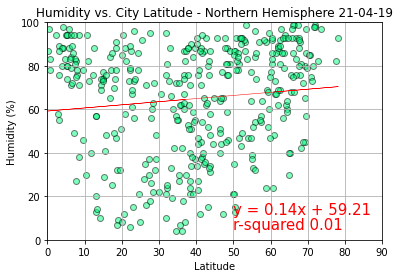

In [136]:
#linear regression
slope_humid_north, int_humid_north, r_humid_north, p_humid_north, std_humid_north = linregress(north_city_data["Lat"], north_city_data["Humidity"])
fit_humid_north = slope_humid_north * north_city_data["Lat"] + int_humid_north
line_humid_north = "y = " + str(round(slope_humid_north,2)) + "x + " + str(round(int_humid_north,2))
r_sq_humid_north = "r-squared " + str(round(r_humid_north**2,2))

#graphing
plt.scatter(north_city_data["Lat"], north_city_data["Humidity"], marker="o", facecolors="springgreen", edgecolors="black", alpha =.5)
plt.xlim(0,90)
plt.ylim(0,100)
plt.title(f"Humidity vs. City Latitude - Northern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.plot(north_city_data["Lat"], fit_humid_north, "red", linewidth=.5)
plt.annotate(line_humid_north ,(50,12),fontsize=15,color="red")
plt.annotate(r_sq_humid_north ,(50,5),fontsize=15,color="red")

plt.savefig("weather_data/humid_latitude_north.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

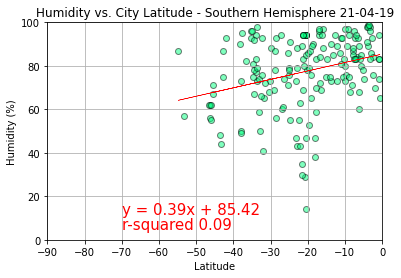

In [137]:
#linear regression
slope_humid_south, int_humid_south, r_humid_south, p_humid_south, std_humid_south = linregress(south_city_data["Lat"], south_city_data["Humidity"])
fit_humid_south = slope_humid_south * south_city_data["Lat"] + int_humid_south
line_humid_south = "y = " + str(round(slope_humid_south,2)) + "x + " + str(round(int_humid_south,2))
r_sq_humid_south = "r-squared " + str(round(r_humid_south**2,2))

#graphing
plt.scatter(south_city_data["Lat"], south_city_data["Humidity"], marker="o", facecolors="springgreen", edgecolors="black", alpha =.5)
plt.xlim(-90,0)
plt.ylim(0,100)
plt.title(f"Humidity vs. City Latitude - Southern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.plot(south_city_data["Lat"], fit_humid_south, "red", linewidth=.5)
plt.annotate(line_humid_south ,(-70,12),fontsize=15,color="red")
plt.annotate(r_sq_humid_south ,(-70,5),fontsize=15,color="red")

plt.savefig("weather_data/humid_latitude_south.png")
plt.show()

The above two plots of Humidity vs. Latitude 

## Cloudiness

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

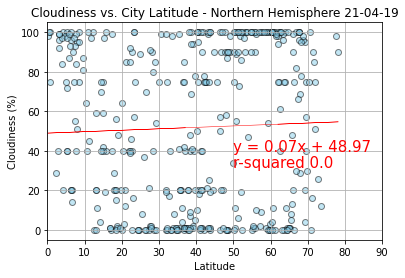

In [131]:
#linear regression
slope_cloud_north, int_cloud_north, r_cloud_north, p_cloud_north, std_cloud_north = linregress(north_city_data["Lat"], north_city_data["Cloudiness"])
fit_cloud_north = slope_cloud_north * north_city_data["Lat"] + int_cloud_north
line_cloud_north = "y = " + str(round(slope_cloud_north,2)) + "x + " + str(round(int_cloud_north,2))
r_sq_cloud_north = "r-squared " + str(round(r_cloud_north**2,2))

#graphing
plt.scatter(north_city_data["Lat"], north_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha =.5)
plt.xlim(0,90)

plt.title(f"Cloudiness vs. City Latitude - Northern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.plot(north_city_data["Lat"], fit_cloud_north, "red", linewidth=.5)
plt.annotate(line_cloud_north ,(50,40),fontsize=15,color="red")
plt.annotate(r_sq_cloud_north ,(50,32),fontsize=15,color="red")

plt.savefig("weather_data/cloud_latitude_north.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

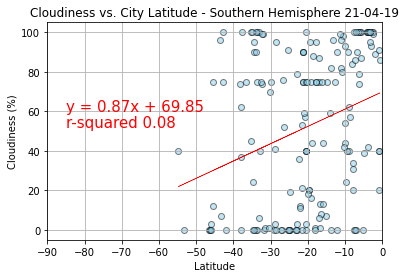

In [132]:
#linear regression
slope_cloud_south, int_cloud_south, r_cloud_south, p_cloud_south, std_cloud_south = linregress(south_city_data["Lat"], south_city_data["Cloudiness"])
fit_cloud_south = slope_cloud_south * south_city_data["Lat"] + int_cloud_south
line_cloud_south = "y = " + str(round(slope_cloud_south,2)) + "x + " + str(round(int_cloud_south,2))
r_sq_cloud_south = "r-squared " + str(round(r_cloud_south**2,2))

#graphing
plt.scatter(south_city_data["Lat"], south_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha =.5)
plt.xlim(-90,0)

plt.title(f"Cloudiness vs. City Latitude - Southern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.plot(south_city_data["Lat"], fit_cloud_south, "red", linewidth=.5)
plt.annotate(line_cloud_south ,(-85,60),fontsize=15,color="red")
plt.annotate(r_sq_cloud_south ,(-85,52),fontsize=15,color="red")

plt.savefig("weather_data/cloud_latitude_south.png")
plt.show()

The above two plots of Cloudiness vs. Latitude both have an r-squared of approximatly 0 this shows that there is not a statistical correlation between the cloudiness of a city and the latitude for both the Northern and Southern Hemispheres. 

## Wind Speed

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

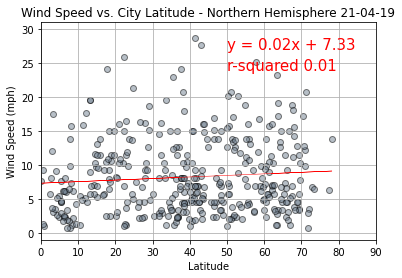

In [143]:
#linear regression
slope_wind_north, int_wind_north, r_wind_north, p_wind_north, std_wind_north = linregress(north_city_data["Lat"], north_city_data["Wind Speed"])
fit_wind_north = slope_wind_north * north_city_data["Lat"] + int_wind_north
line_wind_north = "y = " + str(round(slope_wind_north,2)) + "x + " + str(round(int_wind_north,2))
r_sq_wind_north = "r-squared " + str(round(r_wind_north**2,2))

#graphing
plt.scatter(north_city_data["Lat"], north_city_data["Wind Speed"], marker="o", facecolors="slategrey", edgecolors="black", alpha =.5)
plt.xlim(0,90)
plt.ylim(-1,31)
plt.title(f"Wind Speed vs. City Latitude - Northern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.plot(north_city_data["Lat"], fit_wind_north, "red", linewidth=.5)
plt.annotate(line_wind_north ,(50,27),fontsize=15,color="red")
plt.annotate(r_sq_wind_north ,(50,24),fontsize=15,color="red")

plt.savefig("weather_data/wind_latitude_north.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

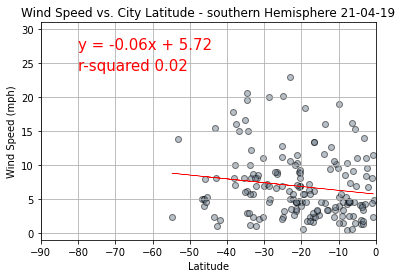

In [142]:
#linear regression
slope_wind_south, int_wind_south, r_wind_south, p_wind_south, std_wind_south = linregress(south_city_data["Lat"], south_city_data["Wind Speed"])
fit_wind_south = slope_wind_south * south_city_data["Lat"] + int_wind_south
line_wind_south = "y = " + str(round(slope_wind_south,2)) + "x + " + str(round(int_wind_south,2))
r_sq_wind_south = "r-squared " + str(round(r_wind_south**2,2))

#graphing
plt.scatter(south_city_data["Lat"], south_city_data["Wind Speed"], marker="o", facecolors="slategrey", edgecolors="black", alpha =.5)
plt.xlim(-90,0)
plt.ylim(-1,31)
plt.title(f"Wind Speed vs. City Latitude - southern Hemisphere {thedate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.plot(south_city_data["Lat"], fit_wind_south, "red", linewidth=.5)
plt.annotate(line_wind_south ,(-80,27),fontsize=15,color="red")
plt.annotate(r_sq_wind_south ,(-80,24),fontsize=15,color="red")

plt.savefig("weather_data/wind_latitude_south.png")
plt.show()

The above two plots of Wind Speed vs. Latitude both have an r-squared of approximatly 0 this shows that there is not a statistical correlation between the wind speed of a city and the latitude for both the Northern and Southern Hemispheres. 